# 파이썬 활용 디지털마케팅 데이터분석 및 기획

# Today's mission

- 고객 Funnel 분석
- 문제 정의 및 가설 설정  
  (문제정의, 가설 정립 및 예상 결과)
- 분석 프레임  
  (MECE 방법론, 타당도와 신뢰도, 로직 트리, 추가 고려요소)
- 데이터 전처리  
  (데이터 전처리 가이드라인, 전처리 실습)
- 고객 Funnel 분석 : 분석(일별 통계, 변수별 통계, 구간별 전환율, 클러스터별 차이)
- 고객 Funnel 분석 : 보고서 작성

]

## Day03-3A Funnel 분석 (실습) - 데이터 분석 (1)

- 분석  
  (일별 통계, 변수별 통계, 구간별 전환율, 클러스터별 차이)

데이터 전처리 과정이 완료되면 데이터 분석 과정을 진행한다.  
데이터 분석은 매우 넓은 범위를 포괄하는데, 일반적으로 EDA라고 불리는 탐색적 데이터 분석을 위해 전통적인 통계 분석, 기계학습(Feature Engineering), 시각화 기법 등 다양한 방식이 활용되며 단순한 EDA를 끝으로 업무/프로젝트가 완료되는 경우도 많다. 

EDA는 분석가가 데이터를 이해하고 모델링을 잘 하기 위한 필수적인 과정이다.  
간혹 EDA 과정을 통한 충분한 이해와 Feature selection 없이 모델링을 바로 진행하는 경우가 있는데, 성능이 안 좋은 모델이 구축되거나 성능 개선에 많은 시간이 소요되므로 지양해야 한다.

이번 가상 케이스의 경우 EDA만을 통해 원하는 목적을 달성할 수 있으므로 EDA를 끝으로 분석 업무가 마무리 될 예정이다.  
보통 이 단계쯤에서는 목적을 다시 한번 상기하는 것이 도움이 될 수 있다. 초반에 설정한 목적을 확인하고 아래 과정을 실습해보자.

### EDA (탐색적 데이터 분석)

- 일별 주요 통계
- 변수별 특성
- 구간별 전환율 (Funnel Analysis)
- 클러스터링
- 클러스터별 전환율 차이 파악

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

In [2]:
df = pd.read_csv("data/df_funnel2.csv", index_col=0)

In [3]:
df

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2
...,...,...,...,...,...,...,...,...
301856,CLOSE,View,XLS,sess132151,OTHERAPP,2016-07-07,Main,3
301857,OPEN,NoView,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301858,RESET,View,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301859,OPEN,NoView,PPT,sess132153,OTHERAPP,2016-07-14,Main,3


### 일별 주요 통계

일별로 주요 지표의 흐름을 보는 것은 특정 패턴을 발견하는 데 유용하다.  
특정 주나 월, 요일별로 데이터 패턴을 보거나 주요 화면의 빈도를 구함으로써 앱의 사용성 패턴에 대해 감을 잡을 수 있다.

- 일별, 요일별 데이터 빈도 및 증감 패턴
- 시간 변수와 다른 카테고리별 변수(피벗)의 상호작용

### 일별 Trend

- 탐색 내용
    - 일별 로그 카운트
    - 일별 세션 카운트
    - 요일별 세션 카운트

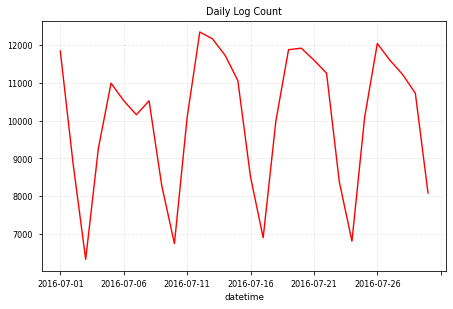

In [4]:
# daily log size
df.groupby("datetime").size().plot(c='r');

plt.title("Daily Log Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

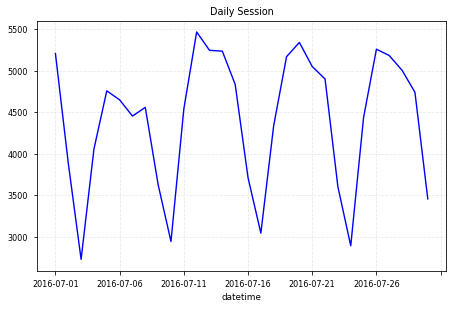

In [5]:
# daily session count => activness index
df.groupby("datetime")['sessionid'].nunique().plot(c='b');

plt.title("Daily Session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

**Note**

- 앱 사용에 seasonality 존재
- 로그수와 세션수의 트렌드가 유사

In [6]:
df

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2
...,...,...,...,...,...,...,...,...
301856,CLOSE,View,XLS,sess132151,OTHERAPP,2016-07-07,Main,3
301857,OPEN,NoView,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301858,RESET,View,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301859,OPEN,NoView,PPT,sess132153,OTHERAPP,2016-07-14,Main,3


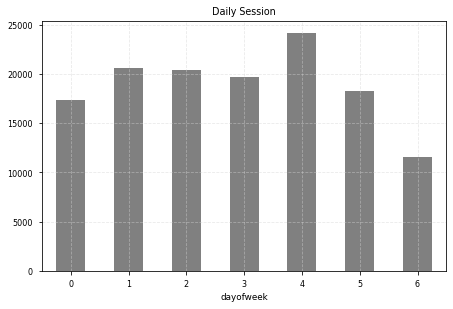

In [7]:
## daily session count (weekofday)
# 0: Monday, 6: Sunday

s = df.groupby("dayofweek")['sessionid'].nunique()

s.plot(color='grey', kind='bar', rot=0);

plt.title("Daily Session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

**Note**

- 주말에 사용성이 매우 감소하고 주중 초반이 높은편
- 문서앱이라는 특성상, 직장인 혹은 학생이 주로 사용할 것으로 가정하면 당연한 결과

**탐색 내용**
    - 일별, 확장자별 로그수
    - 일별, 위치별 로그수
    - 일별, 액션별 로그수
    - 일별, 화면 스크린별 유니크 유저수

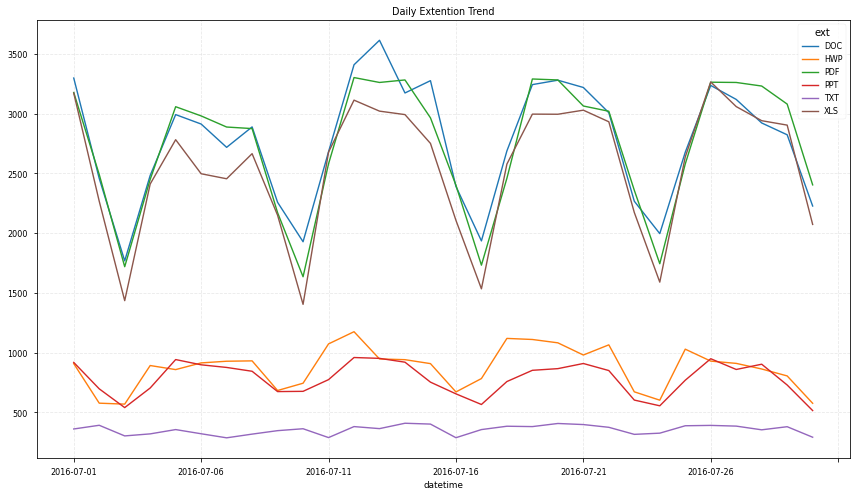

In [8]:
# daily trend by extention
df.groupby(["datetime", "ext"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily Extention Trend")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

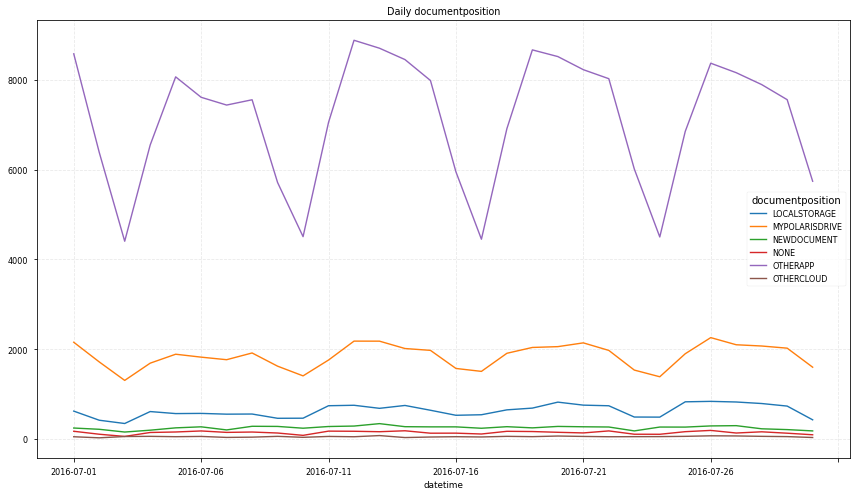

In [9]:
# daily trend by doc position
df.groupby(["datetime", "documentposition"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily documentposition")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

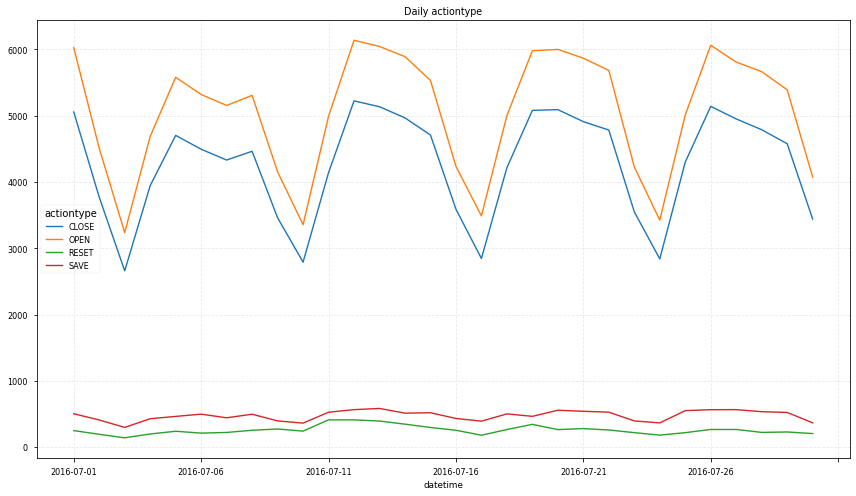

In [10]:
# daily trend by action type
df.groupby(["datetime", "actiontype"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily actiontype")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

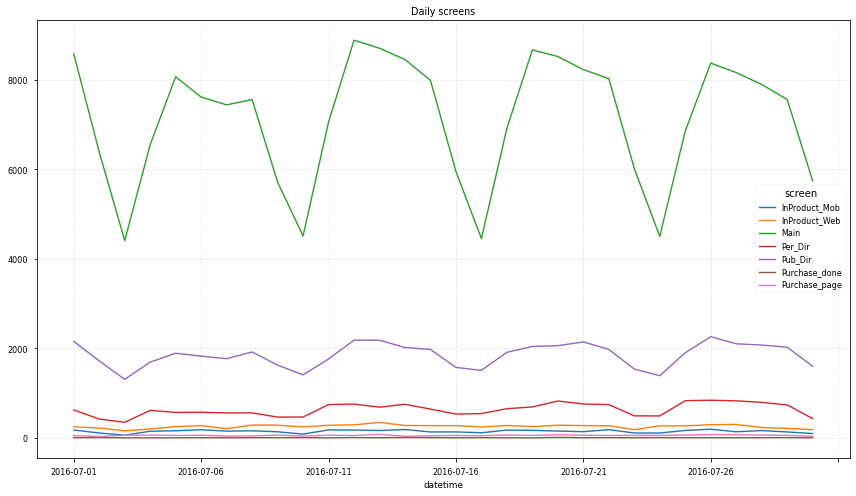

In [11]:
# daily trend by screen name
df.groupby(["datetime", "screen"]).size().unstack().fillna(0).astype(int).plot(figsize=(12,7));

plt.title("Daily screens")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [12]:
# heat map
screens = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack().fillna(0).astype(int)

# cols order change
screens = screens[screens.mean().sort_values(ascending=False).index]

screens[:10]

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3911,1112,381,178,143,24,2
2016-07-02,2935,888,251,140,92,15,2
2016-07-03,2005,648,197,85,50,33,0
2016-07-04,3016,847,349,120,124,32,0
2016-07-05,3631,942,354,159,127,28,1
2016-07-06,3525,949,374,163,148,31,1
2016-07-07,3433,896,324,133,127,18,0
2016-07-08,3477,961,339,169,127,23,2
2016-07-09,2605,865,277,178,110,30,2


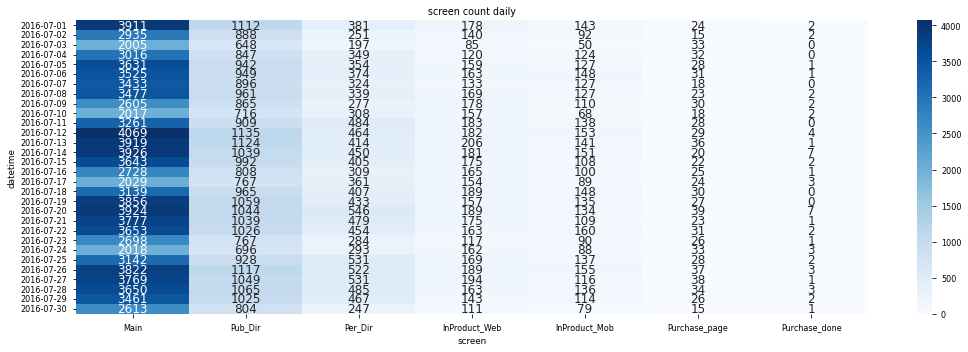

In [13]:
plt.subplots(figsize=(15,5))

sns.heatmap(screens, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Blues');

plt.title("screen count daily")
plt.tight_layout()

**Note**
- doc, pdf, xls 순으로 주로 사용
- 주요 문서 이용 위치는 otherapp 
- Main -> 구매완료(purchase_done) 까지 과정에서 대부분 이탈

### 변수별 특성 (분포, 상관관계)

변수에 대한 이해를 위해 많이 사용되는 시각화 기법이 Scatter Matrix 이다.  
변수별 히스토그램과 변수가 Scatter Plot을 동시에 보여주기 때문에 한눈에 데이터 특성을 파악하기 용이하다.  
이외 Box Plot, Bar Plot 등 다양한 시각화 기법이 이용된다.

- Histogram
- Scatter Plot
- Box Plot
- Bar Plot

## Day03-3A Funnel 분석 (실습) - 데이터 분석 (2)

### Pivoting 을 통한 변수별 특성 탐색
- unstack, stack, pivot_table 과 같은 pandas 함수를 이용해, 다양한 각도에서 데이터 탐색

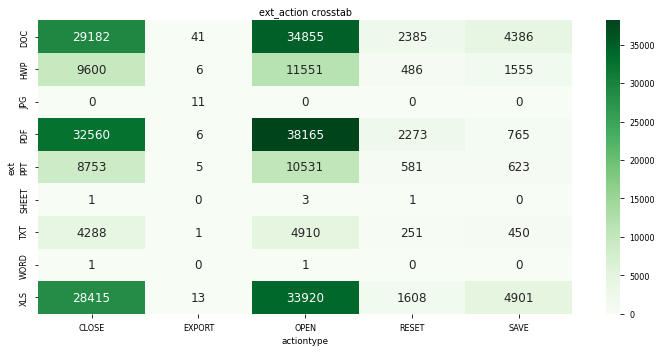

In [14]:
plt.subplots(figsize=(10,5))

ext_action = df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).astype(int)
sns.heatmap(ext_action, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Greens');

plt.title("ext_action crosstab")
plt.tight_layout()

In [15]:
df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0)

actiontype,CLOSE,EXPORT,OPEN,RESET,SAVE
ext,,,,,
DOC,29182.0,41.0,34855.0,2385.0,4386.0
HWP,9600.0,6.0,11551.0,486.0,1555.0
JPG,0.0,11.0,0.0,0.0,0.0
PDF,32560.0,6.0,38165.0,2273.0,765.0
PPT,8753.0,5.0,10531.0,581.0,623.0
SHEET,1.0,0.0,3.0,1.0,0.0
TXT,4288.0,1.0,4910.0,251.0,450.0
WORD,1.0,0.0,1.0,0.0,0.0
XLS,28415.0,13.0,33920.0,1608.0,4901.0


In [16]:
# count to percent : 열 단위 비율
df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).apply(lambda x: x/x.sum()*100).round(2)

actiontype,CLOSE,EXPORT,OPEN,RESET,SAVE
ext,,,,,
DOC,25.87,49.40,26.02,31.44,34.59
HWP,8.51,7.23,8.62,6.41,12.26
JPG,0.00,13.25,0.00,0.00,0.00
PDF,28.87,7.23,28.49,29.97,6.03
PPT,7.76,6.02,7.86,7.66,4.91
SHEET,0.00,0.00,0.00,0.01,0.00
TXT,3.80,1.20,3.67,3.31,3.55
WORD,0.00,0.00,0.00,0.00,0.00
XLS,25.19,15.66,25.33,21.20,38.65


In [17]:
# count to percent : 행 당위 비율
df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).apply(lambda x: x/x.sum()*100, axis=1).round(2)

actiontype,CLOSE,EXPORT,OPEN,RESET,SAVE
ext,,,,,
DOC,41.19,0.06,49.20,3.37,6.19
HWP,41.38,0.03,49.79,2.10,6.70
JPG,0.00,100.00,0.00,0.00,0.00
PDF,44.14,0.01,51.74,3.08,1.04
PPT,42.71,0.02,51.39,2.84,3.04
SHEET,20.00,0.00,60.00,20.00,0.00
TXT,43.31,0.01,49.60,2.54,4.55
WORD,50.00,0.00,50.00,0.00,0.00
XLS,41.27,0.02,49.26,2.34,7.12


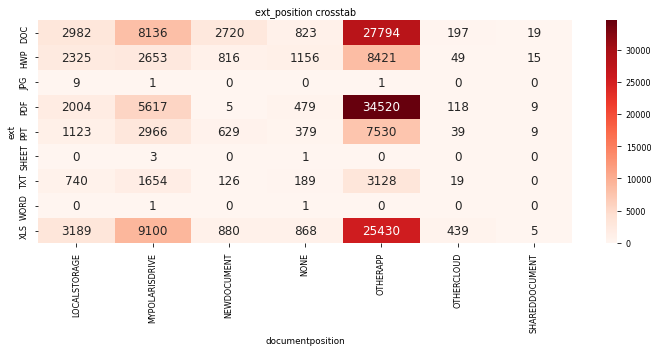

In [18]:
plt.subplots(figsize=(10,5))

ext_pos = df.groupby(["ext", "documentposition"])['sessionid'].nunique().unstack().fillna(0).astype(int)

sns.heatmap(ext_pos, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Reds');

plt.title("ext_position crosstab")
plt.tight_layout()

### 변수별 분포 및 상관관계

In [19]:
df.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2
5,RESET,View,PDF,sess1,OTHERAPP,2016-07-06,Main,2
6,CLOSE,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main,2
7,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main,2
8,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main,3
9,CLOSE,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main,3


**Quiz** 
- 변수별 상관관계/분포를 파악하기 위한 분석단위는?  필요 함수는?

In [20]:
ext_by_session = df.query("actiontype == 'OPEN'").groupby(["sessionid", "ext"]).size().unstack().dropna(how='all')

ext_by_session.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
sessionid,,,,,,,,
sess0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
sess1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
sess10,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
sess100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
sess1000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [21]:
pos_by_session = df.query("actiontype == 'OPEN'").groupby(['sessionid', 'documentposition']).size().unstack().dropna(how='all')

pos_by_session.head()

documentposition,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
sessionid,,,,,,
sess0,1.0,1.0,NaN,NaN,NaN,NaN
sess1,NaN,NaN,NaN,1.0,NaN,NaN
sess10,NaN,1.0,NaN,1.0,NaN,NaN
sess100,NaN,NaN,NaN,1.0,NaN,NaN
sess1000,NaN,NaN,NaN,1.0,NaN,NaN


In [22]:
# Join => sessionid becomes unique (primary key)
exp_pos = pd.concat([ext_by_session, pos_by_session], axis=1).fillna(0)

exp_pos.head()

,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
sessionid,,,,,,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
exp_pos.describe().round(2)

,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
count,120657.00,120657.00,120657.00,120657.00,120657.0,120657.00,120657.0,120657.00,120657.00,120657.00,120657.00,120657.00,120657.00,120657.00
mean,0.34,0.11,0.35,0.10,0.0,0.04,0.0,0.31,0.07,0.21,0.04,0.93,0.01,0.00
std,0.59,0.35,0.55,0.35,0.0,0.21,0.0,0.54,0.27,0.47,0.20,0.69,0.08,0.02
min,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,1.00,0.00,1.00,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.00,1.00,0.00,0.00
max,6.00,6.00,4.00,5.00,1.0,4.00,1.0,7.00,5.00,7.00,4.00,9.00,4.00,2.00


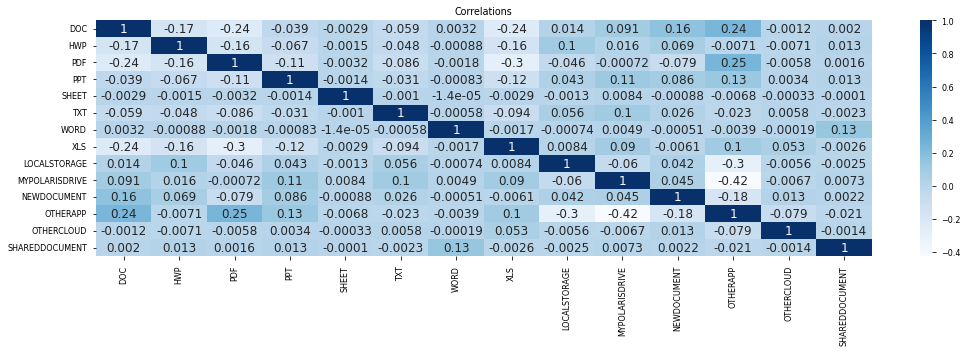

In [24]:
plt.subplots(figsize=(15,5))

sns.heatmap(exp_pos.corr(), annot=True, annot_kws={"size": 12}, cmap='Blues');

plt.title("Correlations")
plt.tight_layout()

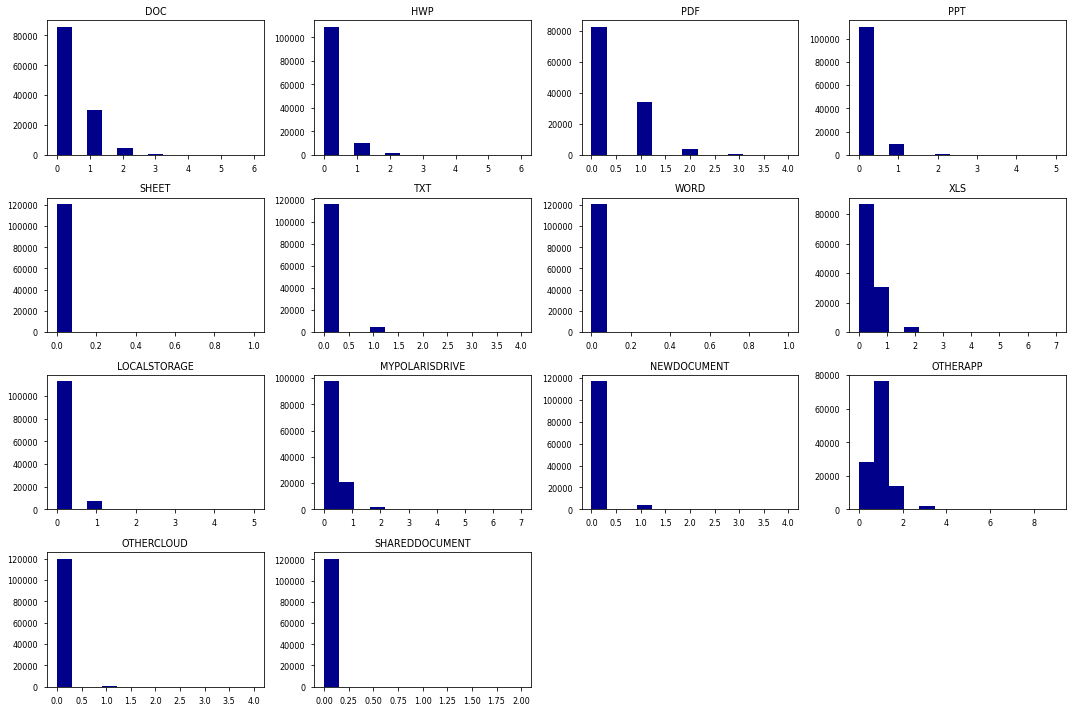

In [25]:
exp_pos.hist(bins=13, color='darkblue', figsize=(15,10), grid=False);

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### 클러스터 별 전환율 차이

전체 유저를 대상으로 전환율을 구할 경우 큰 Implication 을 얻기 어렵다.  
최대한 쪼개서 볼수록 많은 인사이트를 얻을 수 있으며, 유저를 분류할 때 많이 쓰이는 기법이 클러스터링이다.

- 클러스터링을 위한 주요 변수 설정 (필요시 PCA로 차원 축소)
- K-Means 알고리즘 적용후 그룹핑
- 그룹별 대푯값 및 시각화 등을 통해 탐색
- 여러 요인을 카테고리 단으로 묶는 요인분석(Factor Analysis)과 목적이 다름에 유의

### 구간별 전환율

전환율을 구하기 위한 수식은 간단하다.   
분자 / 분모 * 100 수식을 이용해 간단히 전환%를 산출할 수 있다.

- 주요 구간 설정
- 전환율 수식 적용

### 구간별 전환율 (Funnel) Daily Trend

In [26]:
# daily session count by screen
screens.head(10)

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3911,1112,381,178,143,24,2
2016-07-02,2935,888,251,140,92,15,2
2016-07-03,2005,648,197,85,50,33,0
2016-07-04,3016,847,349,120,124,32,0
2016-07-05,3631,942,354,159,127,28,1
2016-07-06,3525,949,374,163,148,31,1
2016-07-07,3433,896,324,133,127,18,0
2016-07-08,3477,961,339,169,127,23,2
2016-07-09,2605,865,277,178,110,30,2


In [27]:
# mean of each columns
conver_cnt = screens.mean().apply(lambda x: int(x)).sort_values(ascending=False)

conver_cnt

screen
Main             3255
Pub_Dir           939
Per_Dir           390
InProduct_Web     161
InProduct_Mob     119
Purchase_page      27
Purchase_done       1
dtype: int64

In [28]:
# average conversion rate
for i in range(len(conver_cnt)-1):
    print((conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2))

28.85
41.53
41.28
73.91
22.69
3.7


In [29]:
# another option for gettig average conversion rate
conver_rt = [(conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2) for i in range(len(conver_cnt)) if i < 6]

conver_rt

[28.85, 41.53, 41.28, 73.91, 22.69, 3.7]

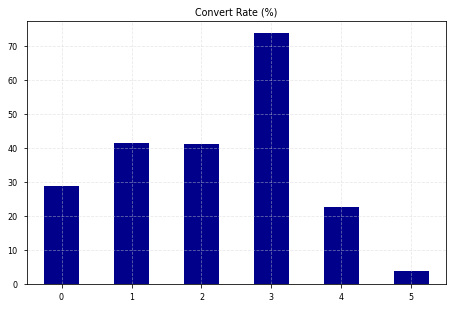

In [30]:
pd.Series(conver_rt).plot(kind='bar', color = 'darkblue', rot=0)

plt.title("Convert Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [31]:
# create x labels
fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 6]

fun_label

['Main > Pub_Dir',
 'Pub_Dir > Per_Dir',
 'Per_Dir > InProduct_Web',
 'InProduct_Web > InProduct_Mob',
 'InProduct_Mob > Purchase_page',
 'Purchase_page > Purchase_done']

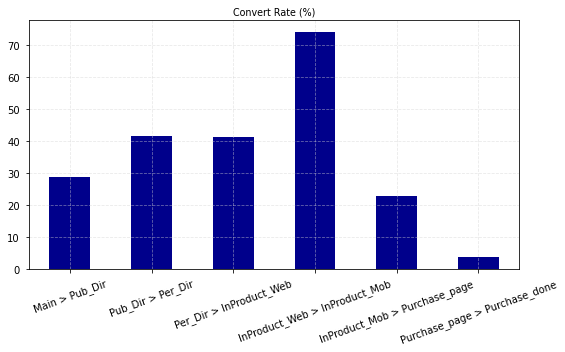

In [32]:
# with revised x labels
pd.Series(conver_rt, index=fun_label).plot(kind='bar', color = 'darkblue', rot=20, figsize=(8,5), fontsize=10)

plt.title("Convert Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

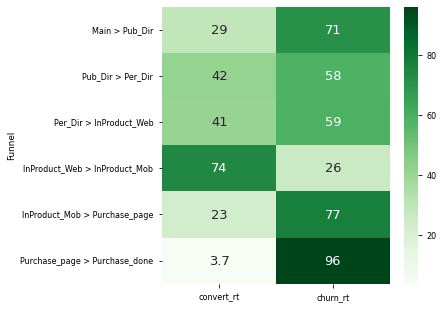

In [33]:
# another visualization
conv_rt_tb = pd.Series(conver_rt, index=fun_label).to_frame()
conv_rt_tb.index.name = 'Funnel'
conv_rt_tb.columns = ['convert_rt']
conv_rt_tb['churn_rt'] = 100 - conv_rt_tb['convert_rt']

sns.heatmap(conv_rt_tb, annot=True, annot_kws={"size": 13}, cmap='Greens');

plt.tight_layout()

]

### 중간 정리
- **일별 주요 통계**

    - 활성화 세션의 경우 주말에 감소하고 주중에 증가하는 트렌드 보임
    - 확장자별 1 tier에는 pdf, xls, doc가 포지셔닝되며, 2 tier에는 hwp, ppt가 포함됨
    - 문서의 이용 위치는 'other app' 이 압도적으로 높음
    - 스크린별로 사용성 파악 결과, 메인(main) 화면이 가장 많이 노출되며 다음 화면(pub_dir or per_dir)으로 넘어가는 경우 많지 않음


- **구간별 전환율**

    - 전환율이 가장 낮은 구간(=이탈이 가장 높은 구간)은 구매정보 페이지에서 구매 완료 페이지로 전환하는 구간임(3.7%)
    - 제품내 웹 -> 앱으로 전환하는 구간은 전환율이 양호함(74%)

## Day03-3B Funnel 분석 (실습) - 클러스터링 For Targeting

### 심슨의 역설

- 심슨의 역설(Simpson's paradox)은 서로 다른 두 그룹에서 발생한 경향성이 전체에서는 역전될 수 있는 현상을 뜻합니다. 이러한 역설은 통계학에서 매우 중요한 현상으로, 잘못된 결론에 이르게 할 수 있기 때문에 주의가 필요합니다.


- 예를 들어, 어떤 회사에서 A와 B 두 종류의 제품을 판매하고 있다고 가정해봅시다. A 제품은 60%의 성능을 보이고, B 제품은 40%의 성능을 보인다고 합니다. 이 때, A 제품과 B 제품을 구매한 고객들의 만족도를 조사한 결과, A 제품을 구매한 고객의 만족도는 80%이고, B 제품을 구매한 고객의 만족도는 70%이라고 합시다.


- 하지만 전체를 보면 A 제품의 만족도는 48%이고, B 제품의 만족도는 56%이며, B 제품이 더 만족도가 높다는 결론이 나오게 됩니다. 이것이 바로 심슨의 역설입니다. 즉, 전체를 보면 B 제품이 더 만족도가 높지만, 각각의 그룹에서는 A 제품을 구매한 고객이 더 만족스러운 결과를 보인다는 것입니다.


- 이처럼 심슨의 역설은 전체 데이터를 제대로 이해하지 않으면 잘못된 결론을 내리게 됩니다. 따라서 통계 분석을 할 때는 심슨의 역설을 유념하여 전체 데이터와 부분 데이터를 함께 고려해야 합니다.


- 참고 : http://www.mathpark.com/530

### What is K-MEANS?

- K-Means는 비지도학습(Unsupervised Learning) 중 하나로, 데이터 포인트를 클러스터(Cluster)로 그룹화하는 알고리즘입니다. 이 알고리즘은 데이터가 주어지면 각 데이터 포인트를 K개의 클러스터 중 하나에 할당하고, 클러스터의 중심을 찾아 이 중심을 기준으로 새로운 클러스터를 생성하는 과정을 반복하여 클러스터링을 수행합니다.


- K-Means 알고리즘의 기본적인 동작 방식은 다음과 같습니다.

  1. 초기화: 클러스터의 수 K를 결정하고, 임의의 K개의 데이터 포인트를 초기 클러스터 중심으로 설정합니다.

  2. 할당: 모든 데이터 포인트를 가장 가까운 클러스터 중심에 할당합니다.

  3. 재계산: 각 클러스터의 중심을 다시 계산합니다.

  4. 반복: 클러스터 중심을 업데이트하고, 할당 단계와 재계산 단계를 반복합니다. 이 과정을 클러스터의 중심이 변하지 않거나, 지정된 반복 횟수에 도달할 때까지 반복합니다.


- K-Means 알고리즘은 다음과 같은 특징을 가집니다.

  1. K-Means 알고리즘은 데이터를 클러스터링하는 데 적합한 알고리즘 중 하나입니다.
  2. K-Means 알고리즘은 대량의 데이터에 대해 빠르고 효율적인 처리가 가능합니다.
  3. 초기 클러스터 중심의 위치에 따라 알고리즘의 결과가 달라질 수 있습니다.
  4. K의 값을 사전에 지정해야 하며, 이 값이 잘못 지정되면 클러스터링 결과가 부적절해질 수 있습니다.


- K-Means 알고리즘은 군집(Clustering) 분석, 이미지 처리, 이상치 검출 등 다양한 분야에서 사용됩니다.


- 참고: http://rfriend.tistory.com/228 
![imge](https://t1.daumcdn.net/cfile/tistory/2649913A57A572321D) 

In [38]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2


In [39]:
# 확장자만 기준으로 group by sessionid 하여 클러스터링을 위한 전처리 진행
# Note. if 다른 변수가 같이 있다면 scaling 필수
df_ext = df.query("actiontype == 'OPEN'").groupby(["sessionid", "ext"]).size().unstack().fillna(0)

df_ext.head(10)

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
sessionid,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess10000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess100001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sess100002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_ext_elbow = df_ext.copy()

In [41]:
# fill na using predictive model
from sklearn.cluster import KMeans

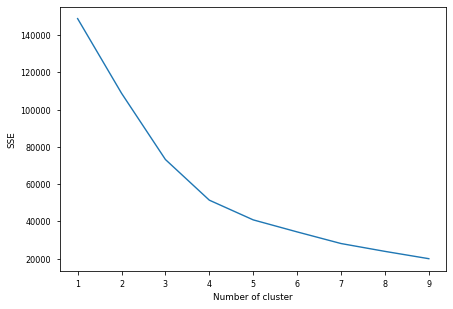

In [42]:
# screen plot with sum of square error
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_ext_elbow)
    df_ext_elbow["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

**Note.**

Silhouette Coefficient Method:
http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

- Silhouette Coefficient는 클러스터링 알고리즘에서 각 데이터 포인트가 자신이 속한 클러스터 내의 유사성과, 다른 클러스터들과의 차이를 측정하는 지표입니다. 이 지표는 클러스터링의 품질을 평가하고, 최적의 클러스터링 개수를 찾는 데 사용됩니다.


- Silhouette Coefficient는 -1과 1 사이의 값을 가지며, 클러스터링 결과가 좋을수록 값이 1에 가까워집니다. 일반적으로 Silhouette Coefficient가 0.5 이상이면 클러스터링 결과가 양호하다고 판단됩니다.


- Silhouette Coefficient를 계산하는 방법은 다음과 같습니다.

  1. 각 데이터 포인트 i에 대해, 해당 포인트가 속한 클러스터 내부의 평균 거리를 계산합니다. 이를 a(i)라고 합니다.

  2. 각 데이터 포인트 i에 대해, 해당 포인트가 속하지 않은 다른 모든 클러스터의 평균 거리를 계산합니다. 이를 b(i)라고 합니다.

  3. 각 데이터 포인트 i에 대해 Silhouette Coefficient를 계산합니다. 이는 (b(i) - a(i)) / max(a(i), b(i))로 정의됩니다.

  4. 모든 데이터 포인트의 Silhouette Coefficient 값을 평균내어 전체 클러스터링의 Silhouette Coefficient를 계산합니다.


- Silhouette Coefficient를 사용하면, 클러스터링 결과를 시각화하고 최적의 클러스터 개수를 선택하는 데 도움이 됩니다. 예를 들어, 다양한 클러스터 개수에 대해 Silhouette Coefficient를 계산하고 이를 그래프로 나타내면, 최적의 클러스터 개수에서 Silhouette Coefficient가 가장 높은 지점을 찾을 수 있습니다. 이를 통해 최적의 클러스터 개수를 선택할 수 있습니다.

In [43]:
km = KMeans(n_clusters=4).fit(df_ext)

In [44]:
labels = km.labels_

labels

array([2, 2, 0, ..., 1, 3, 2])

In [45]:
df_ext['group'] = labels

In [46]:
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


In [47]:
df_ext.group.value_counts()

2    34798
1    34112
3    30109
0    21638
Name: group, dtype: int64

In [48]:
df_ext_mean = df_ext.groupby("group").mean().round(2)

df_ext_mean

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
group,,,,,,,,
0,0.00,0.57,0.01,0.40,0.0,0.19,0.0,0.00
1,1.18,0.00,0.09,0.06,0.0,0.02,0.0,0.07
2,0.01,0.01,1.12,0.02,0.0,0.01,0.0,0.04
3,0.01,0.01,0.01,0.02,0.0,0.01,0.0,1.13


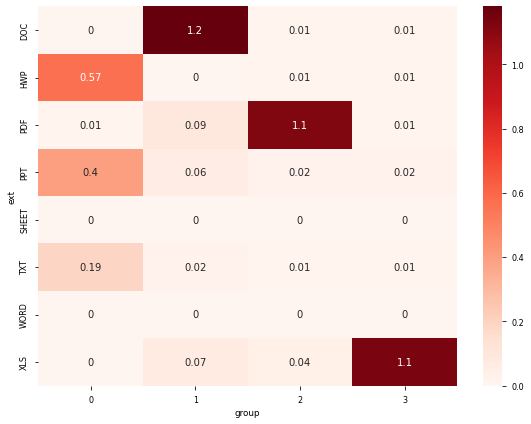

In [49]:
plt.subplots(figsize=(8,6))

sns.heatmap(df_ext_mean.T, annot=True, cmap='Reds')

plt.tight_layout()

**Note.**

- Labeling 주의 (실행시마다 바뀜)

In [50]:
# be careful with the values; the group no. changes randomly
group_name = {0: 'gr_hwp',
              1: 'gr_doc',
              2: 'gr_pdf',
              3: 'gr_xls'}

In [51]:
df_ext['group'] = df_ext['group'].replace(group_name)

In [52]:
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,gr_pdf
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_pdf
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,gr_hwp
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gr_xls
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_pdf


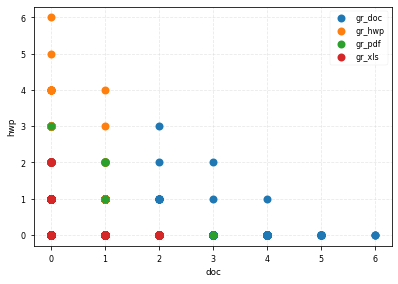

In [53]:
groups = df_ext.groupby("group")

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['DOC'], group['HWP'], marker='o', linestyle='', ms=8, label=name)
    ax.legend()

plt.xlabel("doc")
plt.ylabel("hwp")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

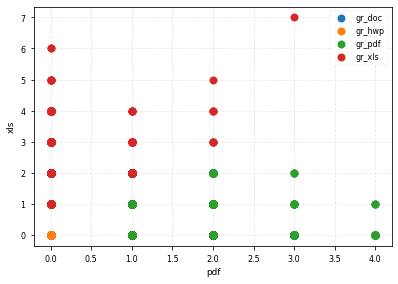

In [54]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['PDF'], group['XLS'], marker='o', linestyle='', ms=8, label=name)
    ax.legend()

plt.xlabel("pdf")
plt.ylabel("xls")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

### 클러스터별 전환율

In [55]:
df_open = df.query("actiontype == 'OPEN'")

df_open.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2
7,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main,2
8,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main,3
10,OPEN,View,PDF,sess3,OTHERAPP,2016-07-28,Main,3
11,OPEN,NoView,PDF,sess4,OTHERAPP,2016-07-19,Main,1
14,OPEN,View,PDF,sess5,MYPOLARISDRIVE,2016-07-24,Pub_Dir,6
16,OPEN,NoView,PDF,sess6,OTHERAPP,2016-07-24,Main,6
18,OPEN,NoView,HWP,sess7,OTHERAPP,2016-07-11,Main,0


In [56]:
df_ext.group.head()

sessionid
sess0       gr_pdf
sess1       gr_pdf
sess10      gr_hwp
sess100     gr_xls
sess1000    gr_pdf
Name: group, dtype: object

In [57]:
df_cluster = df_open.merge(df_ext[['group']].reset_index(), on='sessionid', how='left')

df_cluster.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,dayofweek,group
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0,gr_pdf
1,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0,gr_pdf
2,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2,gr_pdf
3,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main,2,gr_pdf
4,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main,3,gr_pdf
5,OPEN,View,PDF,sess3,OTHERAPP,2016-07-28,Main,3,gr_pdf
6,OPEN,NoView,PDF,sess4,OTHERAPP,2016-07-19,Main,1,gr_pdf
7,OPEN,View,PDF,sess5,MYPOLARISDRIVE,2016-07-24,Pub_Dir,6,gr_pdf
8,OPEN,NoView,PDF,sess6,OTHERAPP,2016-07-24,Main,6,gr_pdf
9,OPEN,NoView,HWP,sess7,OTHERAPP,2016-07-11,Main,0,gr_xls


In [58]:
#define a function to get conversion rates
def conv_rt_by_grp(gr):
    df_gr_screen = df_cluster[df_cluster['group'] == gr]\
                     .groupby(["datetime", "screen"])['sessionid']\
                     .nunique().unstack().fillna(0).astype(int)
            
    conver_cnt = df_gr_screen.mean().apply(lambda x: int(x)).sort_values(ascending=False)
    conver_rt = [conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100 for i in range(len(conver_cnt)) if i < 5]
    fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 5]
    conver_rt = pd.Series(conver_rt, index=fun_label).fillna(0)
    
    return conver_rt

In [59]:
conv_rt_pdf = conv_rt_by_grp('gr_pdf')

conv_rt_pdf

Main > Pub_Dir                    15.301086
Pub_Dir > Per_Dir                 29.677419
Per_Dir > InProduct_Web            4.347826
InProduct_Web > Purchase_page    100.000000
Purchase_page > Purchase_done      0.000000
dtype: float64

In [60]:
conv_rt_doc = conv_rt_by_grp('gr_doc')
conv_rt_doc

Main > Pub_Dir                   24.547511
Pub_Dir > InProduct_Web          34.562212
InProduct_Web > Per_Dir          88.000000
Per_Dir > Purchase_page           4.545455
Purchase_page > Purchase_done     0.000000
dtype: float64

In [61]:
conv_rt_xls = conv_rt_by_grp('gr_xls')
conv_rt_xls

Main > Pub_Dir                   34.135977
Pub_Dir > Per_Dir                27.385892
Per_Dir > InProduct_Web          30.303030
InProduct_Web > Purchase_page    55.000000
Purchase_page > Purchase_done     0.000000
dtype: float64

In [62]:
conv_rt_hwp = conv_rt_by_grp('gr_hwp')
conv_rt_hwp

Main > Pub_Dir                   32.032854
Pub_Dir > Per_Dir                55.128205
Per_Dir > InProduct_Web          38.372093
InProduct_Web > Purchase_page     6.060606
Purchase_page > Purchase_done     0.000000
dtype: float64

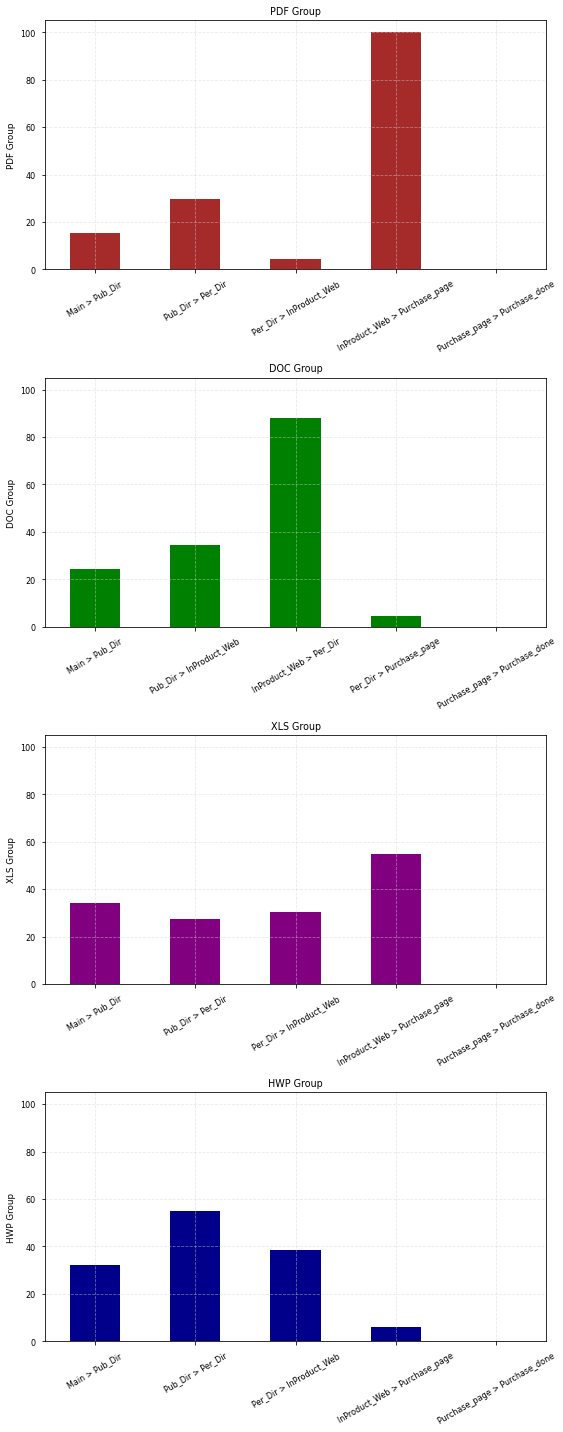

In [63]:
fig, ax = plt.subplots(4, 1, figsize=(8,20), sharey=True)

conv_rt_pdf.plot(kind='bar', ax=ax[0], color = 'brown', rot=30)
ax[0].set_title('PDF Group')
ax[0].set_ylabel('PDF Group')
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_doc.plot(kind='bar', ax=ax[1], color = 'green', rot=30)
ax[1].set_ylabel('DOC Group')
ax[1].set_title('DOC Group')
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_xls.plot(kind='bar', ax=ax[2], color = 'purple', rot=30)
ax[2].set_ylabel('XLS Group')
ax[2].set_title('XLS Group')
ax[2].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_hwp.plot(kind='bar', ax=ax[3], color = 'darkblue', rot=30)
ax[3].set_ylabel('HWP Group')
ax[3].set_title('HWP Group')
ax[3].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

In [64]:
# 그룹별 평균 전환율
gr_pdf_avg = conv_rt_pdf.replace(0, np.nan).mean()
gr_doc_avg = conv_rt_doc.replace(0, np.nan).mean()
gr_xls_avg = conv_rt_xls.replace(0, np.nan).mean()
gr_hwp_avg = conv_rt_hwp.replace(0, np.nan).mean()

print("pdf", gr_pdf_avg)
print("doc", gr_doc_avg)
print("xls", gr_xls_avg)
print("hwp", gr_hwp_avg)

pdf 37.33158283132739
doc 37.91379445980964
xls 36.70622493908084
hwp 32.898439605378144


In [65]:
print(conv_rt_hwp)

Main > Pub_Dir                   32.032854
Pub_Dir > Per_Dir                55.128205
Per_Dir > InProduct_Web          38.372093
InProduct_Web > Purchase_page     6.060606
Purchase_page > Purchase_done     0.000000
dtype: float64


In [66]:
# 가중치 임의 설정
weights = [1, 1.3, 1.5, 2, 2.5]

# 가중 평균
def weight_avg(gr):
    w_avg = (gr.values * weights).sum() / len(gr)
    return w_avg

**Note.**

[가중 산술 평균](https://ko.wikipedia.org/wiki/%EA%B0%80%EC%A4%91_%EC%82%B0%EC%88%A0_%ED%8F%89%EA%B7%A0)

In [67]:
gr_pdf_w = weight_avg(conv_rt_pdf)
gr_doc_w = weight_avg(conv_rt_doc)
gr_xls_w = weight_avg(conv_rt_xls)
gr_hwp_w = weight_avg(conv_rt_hwp)

print("pdf:", gr_pdf_w)
print("doc:", gr_doc_w)
print("xls:", gr_xls_w)
print("hwp:", gr_hwp_w)

pdf: 52.080694035047884
doc: 42.11385919583263
xls: 45.03843650853866
hwp: 34.67577450644162


In [68]:
avg_df = pd.DataFrame(list(zip([gr_pdf_avg, gr_doc_avg, gr_xls_avg, gr_hwp_avg],\
                                   [gr_pdf_w, gr_doc_w, gr_xls_w, gr_hwp_w])), \
                                   columns = ['mean', 'wg_mean'],\
                                   index = ['gr_pdf', 'gr_doc', 'gr_xls', 'gr_hwp'])

avg_df

,mean,wg_mean
gr_pdf,37.331583,52.080694
gr_doc,37.913794,42.113859
gr_xls,36.706225,45.038437
gr_hwp,32.898440,34.675775


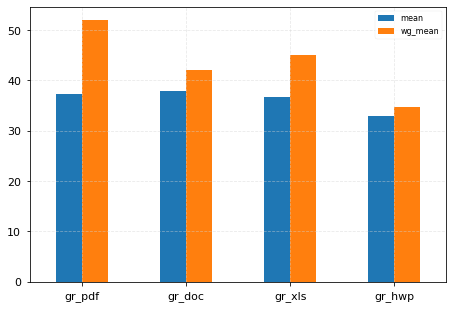

In [69]:
avg_df.plot(kind='bar', fontsize=11, rot=0)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()